## Scoring English Data with Entity-based Language-Agnostic Metrics

In this notebook, we get the Simple and English language Wikipedia editions, annotate entities in them with db-spotlight, get the language agnostic features and save them in a pickled dictionary.

In [1]:
import pickle
import pandas as pd
import numpy as np

In [2]:
figsize = (12, 10)

In [3]:
# this pickle file was tagged with all the DBpedia entity information obtained by running get_entities.py
with open("intermediate/simple_en_entities.pickle", "rb") as input_file:
    data = pickle.load(input_file)

In [4]:
len(data)

85626

In [5]:
k = 85600

In [6]:
import spacy
nlp = spacy.blank('en')
nlp.add_pipe('dbpedia_spotlight', config={'confidence': 0, 'overwrite_ents':False})
text = '‘Attention-deficit hyperactivity disorder (ADHD), or attention deficit disorder (ADD), is a neurodevelopmental disorder.'
entities = []
# doc = nlp(text)
# entities.append([(ent.text, ent.kb_id_,
# ent._.dbpedia_raw_result['@similarityScore']) for ent in doc.ents])

entities

for sent in entities:
    entities = [i[1] for i in sent]
    mentions = [i[0] for i in sent]

**types**: total number of different entities (unique/distinct dbpedia links) or mentions (unique/distinct strings)

**tokens** : total number of entities/mentions (dbpedia links or strings)

entities 

mentions

In [7]:
data[0]['simple']['text'][7]

'German Alpen is the accusative in origin, but  was made the nominative in Modern German, whence also Alm.'

In [8]:
data[0]['simple']['entities'][7]

[('accusative',
  'http://dbpedia.org/resource/Accusative_case',
  '0.9999998618382573'),
 ('Modern German',
  'http://dbpedia.org/resource/German_language',
  '0.9927357414558965')]

In [9]:
unique_entities = set([i[1] for i in data[0]['simple']['entities'][7]])
mentions = [i[0] for i in data[0]['simple']['entities'][7]]

In [10]:
unique_entities

{'http://dbpedia.org/resource/Accusative_case',
 'http://dbpedia.org/resource/German_language'}

In [11]:
mentions

['accusative', 'Modern German']

In [12]:
def get_entities_and_mentions(datapoint_wiki):
    list_of_entity_types_sent = [] 
    list_of_entity_types_doc = []
    list_of_mention_types_sent = []
    list_of_mention_types_doc = []
    list_of_tokens_sent = []
    list_of_tokens_doc = []
    
    for sent in datapoint_wiki['entities']:
        # tokens = all entities & mentions in a sentence
        entities = [i[1] for i in sent]
        mentions = [i[0] for i in sent] # this is the same as above
        
        # types = all unique entities & mentions in a sentence
        unique_entities = set([i[1] for i in sent])
        unique_mentions = set([i[0] for i in sent]) # this is NOT the same as above
        
        list_of_entity_types_sent.append(unique_entities)
        list_of_entity_types_doc.extend(unique_entities)
        list_of_mention_types_sent.append(unique_mentions)
        list_of_mention_types_doc.extend(unique_mentions)
        
        list_of_tokens_sent.append(entities)
        list_of_tokens_doc.extend(entities)
        
    list_of_entity_types_doc = list(set(list_of_entity_types_doc)) # only have different number of entities / mentions across the doc
    list_of_mention_types_doc = list(set(list_of_mention_types_doc))
        
    return list_of_entity_types_sent, list_of_entity_types_doc, list_of_mention_types_sent, list_of_mention_types_doc,\
           list_of_tokens_sent, list_of_tokens_doc
           
#     return list_of_entities_sent, list_of_entities_doc, list_of_mentions_sent, list_of_mentions_doc


In [13]:
# for n, datapoint in enumerate(data[:k]):
#     if n % 10000 == 0:
#         print(n, ' done...')
#     for wiki in ['en', 'simple']:
#         datapoint[wiki]['list_of_entity_types_sent'], datapoint[wiki]['list_of_entity_types_doc'],\
#         datapoint[wiki]['list_of_mention_types_sent'], datapoint[wiki]['list_of_mention_types_doc'],\
#         datapoint[wiki]['list_of_tokens_sent'], datapoint[wiki]['list_of_tokens_doc']\
#         = get_entities_and_mentions(datapoint[wiki])  

In [14]:
# 
with open('intermediate/simple_en_readability_formulae_entities.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [15]:
data[0]['simple']

{'title': 'Alps',
 'text': ['The Alps (, , , , , , ); ; ; ;  is the greatest mountain range of Europe.',
  'It reaches from Austria and Slovenia in the east; through Italy, Switzerland, Liechtenstein and Germany; to France in the west.',
  'The original meaning of the word was \'white\'.The English name Alps was taken from French from Latin Alpes, which may be ultimately alike with Latin albus ("white").',
  'The German Albe, Alpe or Alp (f., Old High German alpâ, plural alpûn), and the French Alpage or Alpe in the singular mean "alpine pasture", and only in the plural may also refer to the mountain range as a whole.Jacob Grimm, Deutsches Wörterbuch, s.v.',
  '"Albe", "Alpe".',
  'The original meaning being "white" (in reference to the permanent snow.',
  'The term may be common Italo-Celtic, since Celtic languages also have terms for high mountains derived from alp.',
  'German Alpen is the accusative in origin, but  was made the nominative in Modern German, whence also Alm.',
  'The 

In [16]:
# todo: put these in utils

# what about syntactic features? a) # tokens, b) average length of sentence (# tokens per sentence / # sentences),
# c) length of document

from nltk.tokenize import word_tokenize

def count_tokens(datapoint_wiki):
    text = ' '.join(datapoint_wiki['text']) # regenerate the whole paragraph from list of sentences.
    doc_len = len(text)
    # avg_sent_len = sum([len(i) for i in datapoint_wiki['text']]) / len(datapoint_wiki['text']) # this was by character length
    avg_sent_len = sum([len(word_tokenize(i)) for i in datapoint_wiki['text']]) / len(datapoint_wiki['text'])
    num_tokens = len(word_tokenize(text))
    return doc_len, avg_sent_len, num_tokens


for datapoint in data[:k]:
    for wiki in ['en', 'simple']:
        datapoint[wiki]['document_length_char'], datapoint[wiki]['average_sentence_length_tokens'], datapoint[wiki]['number_of_tokens'] = count_tokens(datapoint[wiki])

In [17]:
# compare simple and en wiki for mentions and entities based on the following features:
# average sent lenth in tokens
# average sent length in entity types 
# maybe: average sent length in mention types 

for datapoint in data[:k]:
    for wiki in ['en', 'simple']:
        num_sents = len(datapoint[wiki]['text'])
        doc_len = len(datapoint[wiki]['list_of_tokens_doc'])
        
        datapoint[wiki]['avg_sent_length_tokens_lang_agn'] = sum([len(i) for i in datapoint[wiki]['list_of_tokens_sent']]) / num_sents
        datapoint[wiki]['avg_sent_length_entity_types'] = sum([len(i) for i in datapoint[wiki]['list_of_entity_types_sent']]) / num_sents
        datapoint[wiki]['avg_sent_length_mention_types'] = sum([len(i) for i in datapoint[wiki]['list_of_mention_types_sent']]) / num_sents
        
        if datapoint[wiki]['avg_sent_length_tokens_lang_agn'] != 0:
            datapoint[wiki]['sent_type_token_ratio_entity'] = datapoint[wiki]['avg_sent_length_entity_types'] / datapoint[wiki]['avg_sent_length_tokens_lang_agn']
            datapoint[wiki]['sent_type_token_ratio_mention'] = datapoint[wiki]['avg_sent_length_mention_types'] / datapoint[wiki]['avg_sent_length_tokens_lang_agn']
        else:
            datapoint[wiki]['sent_type_token_ratio_entity'] = 0
            datapoint[wiki]['sent_type_token_ratio_mention'] = 0
            
        # doc level features
        if doc_len != 0:
            datapoint[wiki]['doc_type_token_ratio_entity'] = len(datapoint[wiki]['list_of_entity_types_doc']) / doc_len
            datapoint[wiki]['doc_type_token_ratio_mention'] = len(datapoint[wiki]['list_of_mention_types_doc']) / doc_len
        else:
            datapoint[wiki]['doc_type_token_ratio_entity'] = 0
            datapoint[wiki]['doc_type_token_ratio_mention'] = 0
 
        
        

other features [TBD]:
    
1. Average number of mentions per sentence
2. Average number of entities per sentence
3. Type-token ratio of mentions (types=different mentions, tokens=total number of mentions)
4. Type-token-ratio of entities (types=different entities, tokens=total number of entities)
5. Entities to mentions ratio (number of different mentions vs number of different entities)
6. Distance between two mentions (with the same surface form?) in terms of number of mentions 
7. Distance between two mentions (with the same entity-label) in terms of number of mentions


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 

metrics = ['avg_sent_length_tokens_lang_agn', 'avg_sent_length_entity_types', 'avg_sent_length_mention_types', 
           'sent_type_token_ratio_entity', 'sent_type_token_ratio_mention', 'doc_type_token_ratio_entity',
           'doc_type_token_ratio_mention']

sums = {'en' : {}, 'simple' : {}}
datas = {'en' : {}, 'simple' : {}}

In [19]:
for wiki in ['en', 'simple']:
    for metric in metrics:
        sums[wiki][metric] = 0
        datas[wiki][metric] = []

for datapoint in data[:k]:
    for wiki in ['en', 'simple']:
        for metric in metrics:
            sums[wiki][metric] += datapoint[wiki][metric]
            datas[wiki][metric].append(datapoint[wiki][metric])

In [20]:
len(metrics)

7

/home/indira/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/indira/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/indira/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/indira/.local/lib/python3.6/site-packages/matplotlib/axes/_b

/home/indira/.local/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/indira/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/indira/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/indira/anaconda3/envs/py36/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be r

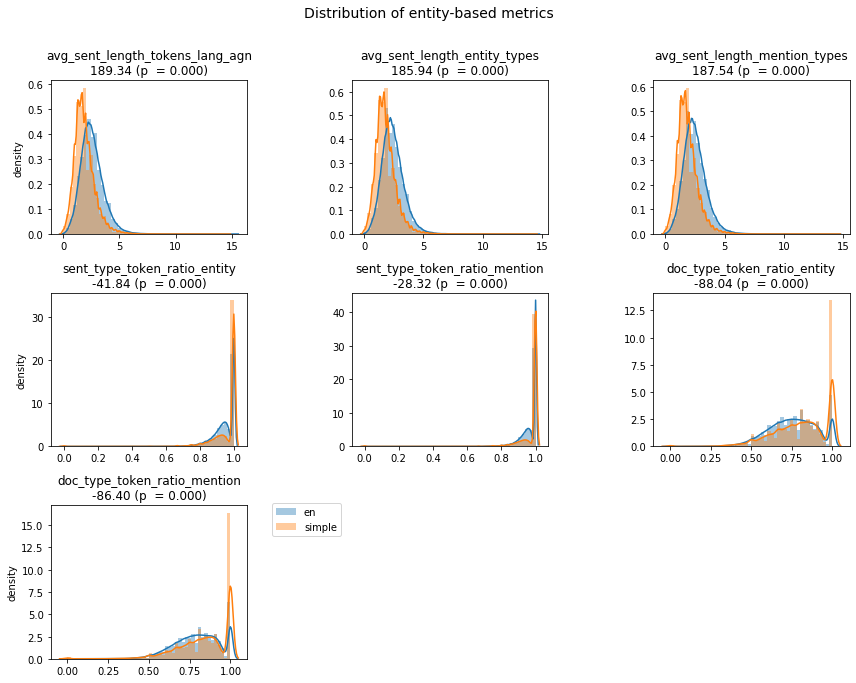

In [21]:
import math

# nrows = 1 if len(metrics) < 5 else 2
# ncols = math.ceil(len(metrics)/nrows)
nrows = 3
ncols = 3
num = 0

fig, axs = plt.subplots(nrows=nrows, ncols=ncols,
                        figsize = (12, nrows*3),
                        sharex = False, sharey = False)

for i in range(nrows):
    for j in range(ncols):
        metric = metrics[num]
        axx = axs[i][j] if nrows > 1 else axs[j]
        sns.distplot(datas['en'][metric], ax = axx, label = 'en')
        sns.distplot(datas['simple'][metric], ax = axx, label = 'simple')
        title = '%s\n%0.2f (p  = %0.3f)' %(metric, stats.ttest_rel(datas['en'][metric], datas['simple'][metric])[0],
                                          stats.ttest_rel(datas['en'][metric], datas['simple'][metric])[1])
        axx.set_title(title)
        if j == 0:
            axx.set_ylabel('density')
        else:
            axx.set_ylabel('')
        num = num+1
        if num == len(metrics):
            break
            
fig.delaxes(axs[2, 1])
fig.delaxes(axs[2, 2])
title = 'Distribution of entity-based metrics'
plt.suptitle(title, fontsize = 14, y = 1.05)
axx.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
# plt.savefig('../plots/' + '_'.join(title.split(' '))+'.pdf')
# plt.savefig('../plots/' + '_'.join(title.split(' '))+'.png')

In [22]:
ens = [sums['en'][metric]/len(datas['en'][metric]) for metric in metrics]
simples = [sums['simple'][metric]/len(datas['simple'][metric]) for metric in metrics]

result_summary = pd.DataFrame([metrics, ens, simples]).transpose()
result_summary.columns = ['metric', 'en', 'simple']
result_summary

metric        en    simple
0  avg_sent_length_tokens_lang_agn   2.57242   1.90302
1     avg_sent_length_entity_types    2.4216    1.8199
2    avg_sent_length_mention_types   2.48117   1.85443
3     sent_type_token_ratio_entity  0.946989  0.960261
4    sent_type_token_ratio_mention  0.968296  0.976064
5      doc_type_token_ratio_entity  0.758137  0.808878
6     doc_type_token_ratio_mention  0.795633  0.843393

In [23]:
print(result_summary.round(2).to_markdown())

|    | metric                          |       en |   simple |
|---:|:--------------------------------|---------:|---------:|
|  0 | avg_sent_length_tokens_lang_agn | 2.57242  | 1.90302  |
|  1 | avg_sent_length_entity_types    | 2.4216   | 1.8199   |
|  2 | avg_sent_length_mention_types   | 2.48117  | 1.85443  |
|  3 | sent_type_token_ratio_entity    | 0.946989 | 0.960261 |
|  4 | sent_type_token_ratio_mention   | 0.968296 | 0.976064 |
|  5 | doc_type_token_ratio_entity     | 0.758137 | 0.808878 |
|  6 | doc_type_token_ratio_mention    | 0.795633 | 0.843393 |


In [24]:
result_summary.round(3).to_csv('../tables/entity_feature_average.csv', sep ='\t', index = False)

In [25]:
with open('intermediate/simple_en_readability_formulae.pickle', 'rb') as handle:
    data_formulae = pickle.load(handle)   
    
readability_metrics = ['flesch_reading_ease', 
                       'flesch_kincaid_grade',
                       'dale_chall_readability_score',
                       'gunning_fog',
                       'smog_index',
                       'automated_readability_index']

In [26]:
# add the readability metrics to the current data dictionary
for n, datapoint in enumerate(data):
    for metric in readability_metrics:
        for edition in ['en', 'simple']:
            datapoint[edition][metric] = data_formulae[n][edition][metric]

### Paired evaluation

for each datapoint, and for each metric, get a label = 1 if the simple edition has a better score, or 0 if not

In [27]:
# where higher score = better readability
higher_metrics = ['flesch_reading_ease',
#                  'sent_type_token_ratio_entity',
#                  'sent_type_token_ratio_mention',
#                  'doc_type_token_ratio_entity',
#                  'doc_type_token_ratio_mention'
                 ]

# where lower score = better readability
lower_metrics = ['flesch_kincaid_grade',
                 'gunning_fog',
                 'smog_index',
                 'automated_readability_index',
                 'dale_chall_readability_score',
                 'document_length_char',
                 'average_sentence_length_tokens',
                 'number_of_tokens',
                 'avg_sent_length_tokens_lang_agn',
                 'avg_sent_length_entity_types',
                 'avg_sent_length_mention_types',
                 'sent_type_token_ratio_entity',
                 'sent_type_token_ratio_mention',
                 'doc_type_token_ratio_entity',
                 'doc_type_token_ratio_mention'
                ]

In [28]:
data[0]['simple'].keys()

dict_keys(['title', 'text', 'entities', 'list_of_entity_types_sent', 'list_of_entity_types_doc', 'list_of_mention_types_sent', 'list_of_mention_types_doc', 'list_of_tokens_sent', 'list_of_tokens_doc', 'document_length_char', 'average_sentence_length_tokens', 'number_of_tokens', 'avg_sent_length_tokens_lang_agn', 'avg_sent_length_entity_types', 'avg_sent_length_mention_types', 'sent_type_token_ratio_entity', 'sent_type_token_ratio_mention', 'doc_type_token_ratio_entity', 'doc_type_token_ratio_mention', 'flesch_reading_ease', 'flesch_kincaid_grade', 'dale_chall_readability_score', 'gunning_fog', 'smog_index', 'automated_readability_index'])

In [29]:
# TODO: random eval for equal scores

for datapoint in data[:k]:
    datapoint['simpler'] = {}
    for metric in lower_metrics:
        if datapoint['simple'][metric] < datapoint['en'][metric]:
            datapoint['simpler'][metric] = 1
        else:
            datapoint['simpler'][metric] = 0
    
    for metric in higher_metrics:
        if datapoint['simple'][metric] > datapoint['en'][metric]:
            datapoint['simpler'][metric] = 1
        else:
            datapoint['simpler'][metric] = 0
        
    

In [30]:
data[0]['simpler']

{'flesch_kincaid_grade': 1,
 'gunning_fog': 1,
 'smog_index': 1,
 'automated_readability_index': 1,
 'dale_chall_readability_score': 1,
 'document_length_char': 1,
 'average_sentence_length_tokens': 0,
 'number_of_tokens': 1,
 'avg_sent_length_tokens_lang_agn': 0,
 'avg_sent_length_entity_types': 0,
 'avg_sent_length_mention_types': 0,
 'sent_type_token_ratio_entity': 1,
 'sent_type_token_ratio_mention': 1,
 'doc_type_token_ratio_entity': 1,
 'doc_type_token_ratio_mention': 1,
 'flesch_reading_ease': 1}

In [31]:
metrics = higher_metrics + lower_metrics

In [32]:
summary = {}

for metric in metrics:
    summary[metric] = len([i for i in data[:k] if i['simpler'][metric] == 1])/len(data[:k])

In [33]:
summary

{'flesch_reading_ease': 0.8700934579439252,
 'flesch_kincaid_grade': 0.8962967289719627,
 'gunning_fog': 0.8933294392523364,
 'smog_index': 0.8867289719626168,
 'automated_readability_index': 0.8993808411214953,
 'dale_chall_readability_score': 0.6698948598130842,
 'document_length_char': 0.8573831775700934,
 'average_sentence_length_tokens': 0.8762383177570093,
 'number_of_tokens': 0.8398364485981309,
 'avg_sent_length_tokens_lang_agn': 0.7568574766355141,
 'avg_sent_length_entity_types': 0.7494509345794392,
 'avg_sent_length_mention_types': 0.7527803738317757,
 'sent_type_token_ratio_entity': 0.21373831775700936,
 'sent_type_token_ratio_mention': 0.15658878504672896,
 'doc_type_token_ratio_entity': 0.32391355140186917,
 'doc_type_token_ratio_mention': 0.3138084112149533}

In [34]:
# for the unpaired eval, what if the scores are equal?
equal_summary = {}

for metric in metrics:
    equal_summary[metric] = len([i for i in data[:k] if i['simple'][metric] == i['en'][metric]])/len(data[:k])
    
equal_summary

{'flesch_reading_ease': 0.006495327102803738,
 'flesch_kincaid_grade': 0.012535046728971962,
 'gunning_fog': 0.00566588785046729,
 'smog_index': 0.021787383177570094,
 'automated_readability_index': 0.009649532710280373,
 'dale_chall_readability_score': 0.0074299065420560745,
 'document_length_char': 0.004205607476635514,
 'average_sentence_length_tokens': 0.007044392523364486,
 'number_of_tokens': 0.008633177570093457,
 'avg_sent_length_tokens_lang_agn': 0.028516355140186914,
 'avg_sent_length_entity_types': 0.03149532710280374,
 'avg_sent_length_mention_types': 0.030595794392523364,
 'sent_type_token_ratio_entity': 0.36255841121495325,
 'sent_type_token_ratio_mention': 0.5066471962616822,
 'doc_type_token_ratio_entity': 0.08689252336448598,
 'doc_type_token_ratio_mention': 0.1051518691588785}

### confusion matrix for agreement among different methods

In [35]:
datapoint['simpler']

{'flesch_kincaid_grade': 1,
 'gunning_fog': 1,
 'smog_index': 1,
 'automated_readability_index': 1,
 'dale_chall_readability_score': 1,
 'document_length_char': 1,
 'average_sentence_length_tokens': 1,
 'number_of_tokens': 1,
 'avg_sent_length_tokens_lang_agn': 1,
 'avg_sent_length_entity_types': 1,
 'avg_sent_length_mention_types': 1,
 'sent_type_token_ratio_entity': 0,
 'sent_type_token_ratio_mention': 0,
 'doc_type_token_ratio_entity': 0,
 'doc_type_token_ratio_mention': 1,
 'flesch_reading_ease': 1}

In [36]:
metric_results = []
for datapoint in data[:k]:
    metric_results.append(datapoint['simpler'])
    
metric_results_df = pd.DataFrame(metric_results)

In [37]:
metric_results_df.columns

Index(['flesch_kincaid_grade', 'gunning_fog', 'smog_index',
       'automated_readability_index', 'dale_chall_readability_score',
       'document_length_char', 'average_sentence_length_tokens',
       'number_of_tokens', 'avg_sent_length_tokens_lang_agn',
       'avg_sent_length_entity_types', 'avg_sent_length_mention_types',
       'sent_type_token_ratio_entity', 'sent_type_token_ratio_mention',
       'doc_type_token_ratio_entity', 'doc_type_token_ratio_mention',
       'flesch_reading_ease'],
      dtype='object')

In [38]:
cols = ['flesch_kincaid_grade', 'gunning_fog', 'smog_index',
       'automated_readability_index', 'flesch_reading_ease', 
       'dale_chall_readability_score', 'document_length_char', 
       'number_of_tokens', 'average_sentence_length_tokens',
       'avg_sent_length_tokens_lang_agn', 'avg_sent_length_entity_types',
       'avg_sent_length_mention_types', 'sent_type_token_ratio_entity',
       'sent_type_token_ratio_mention', 'doc_type_token_ratio_entity',
       'doc_type_token_ratio_mention']
metric_results_df = metric_results_df[cols]

In [39]:
metric_results_df.corr().round(2)

flesch_kincaid_grade  gunning_fog  \
flesch_kincaid_grade                             1.00         0.68   
gunning_fog                                      0.68         1.00   
smog_index                                       0.65         0.68   
automated_readability_index                      0.70         0.62   
flesch_reading_ease                              0.74         0.53   
dale_chall_readability_score                     0.17         0.20   
document_length_char                             0.15         0.12   
number_of_tokens                                 0.13         0.10   
average_sentence_length_tokens                   0.50         0.48   
avg_sent_length_tokens_lang_agn                  0.32         0.31   
avg_sent_length_entity_types                     0.31         0.30   
avg_sent_length_mention_types                    0.32         0.30   
sent_type_token_ratio_entity                    -0.08        -0.06   
sent_type_token_ratio_mention                   -0.07        -0.05   
doc_type_token_ratio_entity                     -0.02         0.02   
doc_type_token_ratio_mention                    -0.02         0.02   

                                 smog_index  automated_readability_index  \
flesch_kincaid_grade                   0.65                         0.70   
gunning_fog                            0.68                         0.62   
smog_index                             1.00                         0.57   
automated_readability_index            0.57                         1.00   
flesch_reading_ease                    0.58                         0.54   
dale_chall_readability_score           0.18                         0.22   
document_length_char                   0.14                         0.16   
number_of_tokens                       0.11                         0.13   
average_sentence_length_tokens         0.40                         0.52   
avg_sent_length_tokens_lang_agn        0.28                         0.34   
avg_sent_length_entity_types           0.28                         0.33   
avg_sent_length_mention_types          0.28                         0.33   
sent_type_token_ratio_entity          -0.06                        -0.08   
sent_type_token_ratio_mention         -0.05                        -0.08   
doc_type_token_ratio_entity           -0.01                        -0.02   
doc_type_token_ratio_mention          -0.01                        -0.01   

                                 flesch_reading_ease  \
flesch_kincaid_grade                            0.74   
gunning_fog                                     0.53   
smog_index                                      0.58   
automated_readability_index                     0.54   
flesch_reading_ease                             1.00   
dale_chall_readability_score                    0.24   
document_length_char                            0.11   
number_of_tokens                                0.08   
average_sentence_length_tokens                  0.32   
avg_sent_length_tokens_lang_agn                 0.25   
avg_sent_length_entity_types                    0.24   
avg_sent_length_mention_types                   0.25   
sent_type_token_ratio_entity                   -0.05   
sent_type_token_ratio_mention                  -0.04   
doc_type_token_ratio_entity                    -0.00   
doc_type_token_ratio_mention                    0.01   

                                 dale_chall_readability_score  \
flesch_kincaid_grade                                     0.17   
gunning_fog                                              0.20   
smog_index                                               0.18   
automated_readability_index                              0.22   
flesch_reading_ease                                      0.24   
dale_chall_readability_score                             1.00   
document_length_char                                    -0.10   
number_of_tokens                                        -0.12   
average_sen

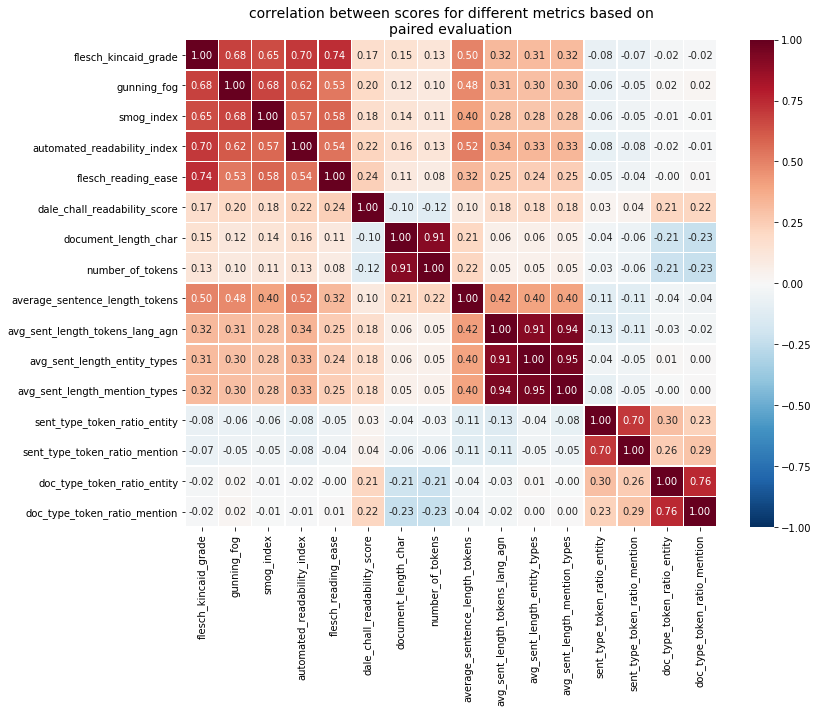

In [40]:
title = 'correlation between scores for different metrics based on\npaired evaluation'
f, ax = plt.subplots(figsize=figsize)
sns.heatmap(metric_results_df.corr(), annot=True, fmt="0.2f", linewidths=.5, ax=ax, cmap='RdBu_r', vmin=-1, vmax=1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title(title, fontsize = 14)
plt.tight_layout()
plt.savefig('../plots/' + '_'.join(title.split(' '))+'.pdf')
plt.savefig('../plots/' + '_'.join(title.split(' '))+'.png')

In [41]:
edition_scores = {}

for datapoint in data[:k]:
    for edition in ['en', 'simple']:
        row = []
        for metric in metrics:
            row.append(datapoint[edition][metric])
        if edition_scores.get(edition):
            edition_scores[edition].append(row)
        else:
            edition_scores[edition] = [row]

In [42]:
simple_edition_scores_df = pd.DataFrame(edition_scores['simple'], columns = metrics)
en_edition_scores_df = pd.DataFrame(edition_scores['en'], columns = metrics)

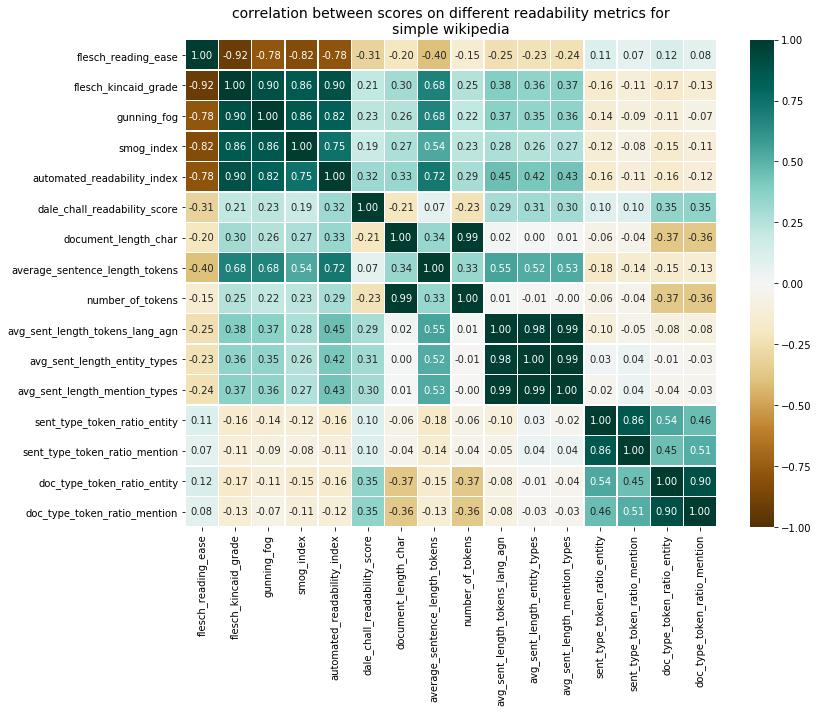

In [43]:
title = 'correlation between scores on different readability metrics for\nsimple wikipedia'
f, ax = plt.subplots(figsize=figsize)
sns.heatmap(simple_edition_scores_df.corr(), annot=True, fmt="0.2f", linewidths=.5, ax=ax, cmap="BrBG", vmin=-1, vmax=1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title(title, fontsize = 14)
plt.tight_layout()
plt.savefig('../plots/' + '_'.join(title.split(' '))+'.pdf')
plt.savefig('../plots/' + '_'.join(title.split(' '))+'.png')

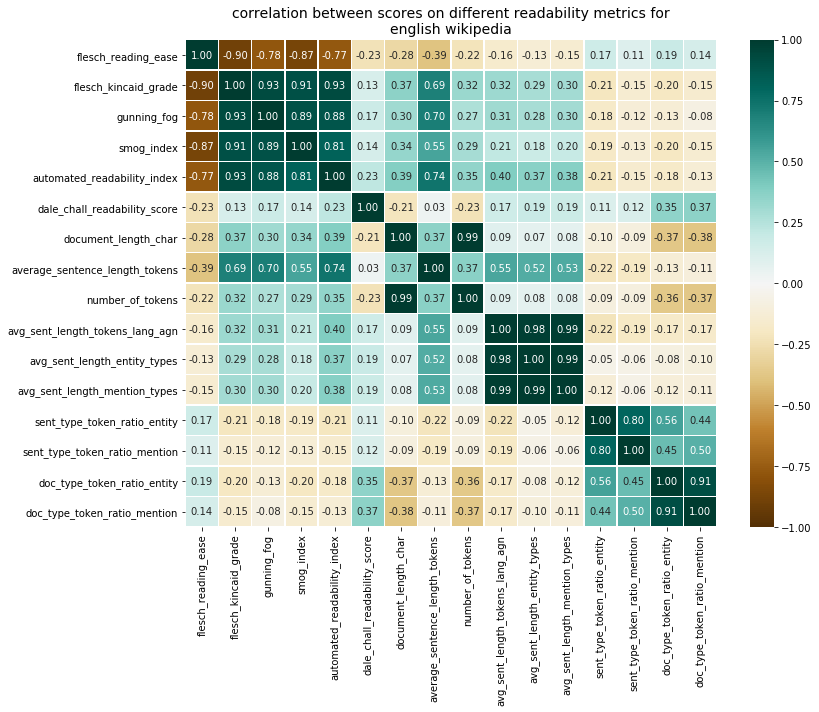

In [44]:
title = 'correlation between scores on different readability metrics for\nenglish wikipedia'
f, ax = plt.subplots(figsize=figsize)
sns.heatmap(en_edition_scores_df.corr(), annot=True, fmt="0.2f", linewidths=.5, ax=ax, cmap="BrBG", vmin=-1, vmax=1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title(title, fontsize = 14)
plt.tight_layout()
plt.savefig('../plots/' + '_'.join(title.split(' '))+'.pdf')
plt.savefig('../plots/' + '_'.join(title.split(' '))+'.png')

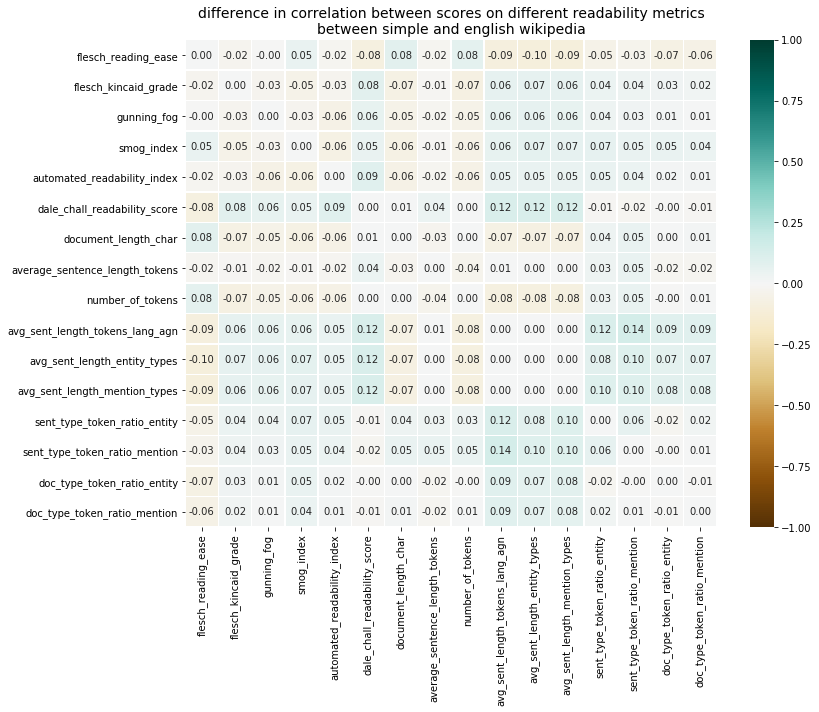

In [45]:
title = 'difference in correlation between scores on different readability metrics\nbetween simple and english wikipedia'
diff = simple_edition_scores_df.corr() - en_edition_scores_df.corr()
f, ax = plt.subplots(figsize=figsize)
sns.heatmap(diff, annot=True, fmt="0.2f", linewidths=.5, ax=ax, cmap="BrBG", vmin=-1, vmax=1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title(title, fontsize = 14)
plt.tight_layout()
plt.savefig('../plots/' + '_'.join(title.split(' '))+'.pdf')
plt.savefig('../plots/' + '_'.join(title.split(' '))+'.png')

In [46]:
# with open('intermediate/simple_en_readability_formulae_entities.pickle', 'wb') as handle:
#     pickle.dump(data, handle, protocol=pickle.HIGHEST_PROTOCOL)   

In [47]:
metric_results_df_ = metric_results_df[['flesch_reading_ease', 'avg_sent_length_tokens_lang_agn',
       'avg_sent_length_entity_types', 'avg_sent_length_mention_types',
       'sent_type_token_ratio_entity', 'sent_type_token_ratio_mention',
       'doc_type_token_ratio_entity', 'doc_type_token_ratio_mention']]

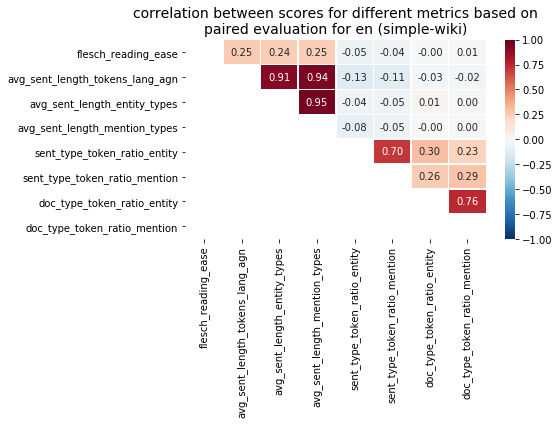

In [48]:
title = 'correlation between scores for different metrics based on\npaired evaluation for en (simple-wiki)'
f, ax = plt.subplots(figsize=(8,6))
corr = metric_results_df_.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)).T
sns.heatmap(corr, mask = mask, annot=True, fmt="0.2f", linewidths=.5, ax=ax, cmap='RdBu_r', vmin=-1, vmax=1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title(title, fontsize = 14)
plt.tight_layout()
# plt.savefig('../plots/' + '_'.join(title.split(' '))+'.pdf')
# plt.savefig('../plots/' + '_'.join(title.split(' '))+'.png')